# Decision Tree Classification

In [1]:
!pip install numpy==1.24.4 scipy==1.10.1 --force-reinstall --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
     --- ------------------------------------ 1.0/10.9 MB 9.5 MB/s eta 0:00:02
     ------------ --------------------------- 3.4/10.9 MB 9.5 MB/s eta 0:00:01
     ---------------------- ----------------- 6.0/10.9 MB 10.3 MB/s eta 0:00:01
     ------------------------ --------------- 6.8/10.9 MB 10.4 MB/s eta 0:00:01
     ---------------------------------- ----- 9.4/10.9 MB 9.2 MB/s eta 0:00:01
     -------------------------------------- - 10.5/10.9 MB 9.0 MB/s eta 0:00:01
     ---------------------------------------- 10.9/10.9 MB 8.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
           ~~~~~~~~^^^^^^^^^^^^^^^
  File "C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
 

In [2]:
!pip install ISLP

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [29]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
    (RandomForestRegressor as RF,
     GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [30]:
import pandas as pd
train = pd.read_csv("C:/Users/lenovo/OneDrive - UGM 365/Dokumen/SEMESTER 4/KOMSTAT II/Project Komstat II/train.csv")
test = pd.read_csv("C:/Users/lenovo/OneDrive - UGM 365/Dokumen/SEMESTER 4/KOMSTAT II/Project Komstat II/test.csv")

In [31]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Pre-Processing Data Train

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [88]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [89]:
train.duplicated().sum()

np.int64(0)

In [90]:
# Menampilkan isi kategori (unique values) dari semua kolom kategorik
for col in train.select_dtypes(include='object').columns:
    print(f"Kategori di kolom '{col}':")
    print(train[col].value_counts().index.tolist())
    print()

Kategori di kolom 'Gender':
['Male', 'Female']

Kategori di kolom 'Vehicle_Age':
['1-2 Year', '< 1 Year', '> 2 Years']

Kategori di kolom 'Vehicle_Damage':
['Yes', 'No']



In [32]:
# Ordinal Encoding
train['Vehicle_Age'] = train['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

# Binary Mapping 
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'No': 0, 'Yes': 1})

# One-Hot Encoding untuk Gender (nominal)
train = pd.get_dummies(train, columns=['Gender'], drop_first=True, dtype=int)

In [33]:
train = train.drop(columns=['id']) 

In [34]:
# Pisahkan fitur dan label
X = train.drop(columns=['Response'])
y = train['Response']

In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=0
)

In [36]:
model = MS(X_train.columns, intercept=False)
X_train_enc = model.fit_transform(X_train)
X_val_enc = model.transform(X_val)

In [37]:
train

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male
0,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,76,1,3.0,0,1,0,33536.0,26.0,183,0,1
2,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,21,1,11.0,1,0,0,28619.0,152.0,203,0,1
4,29,1,41.0,1,0,0,27496.0,152.0,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1,0,30170.0,26.0,88,0,1
381105,30,1,37.0,1,0,0,40016.0,152.0,131,0,1
381106,21,1,30.0,1,0,0,35118.0,160.0,161,0,1
381107,68,1,14.0,0,2,1,44617.0,124.0,74,0,0


## Pre-Processing Data Test

In [38]:
test 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [54]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [55]:
test.duplicated().sum()

np.int64(0)

In [56]:
# Menampilkan isi kategori (unique values) dari semua kolom kategorik
for col in test.select_dtypes(include='object').columns:
    print(f"Kategori di kolom '{col}':")
    print(test[col].value_counts().index.tolist())
    print()

Kategori di kolom 'Gender':
['Male', 'Female']

Kategori di kolom 'Vehicle_Age':
['1-2 Year', '< 1 Year', '> 2 Years']

Kategori di kolom 'Vehicle_Damage':
['Yes', 'No']



In [39]:
# Ordinal Encoding
test['Vehicle_Age'] = test['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

# Binary Mapping (Ordinal Encoding juga bisa dibilang untuk 2 kelas)
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'No': 0, 'Yes': 1})

# One-Hot Encoding untuk Gender (nominal)
test = pd.get_dummies(test, columns=['Gender'], drop_first=True, dtype=int)

In [40]:
# Simpan id untuk submission
test_id = test['id'].copy()

# Drop kolom id sebelum transformasi
test = test.drop(columns=['id'])

In [41]:
test

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male
0,25,1,11.0,1,0,0,35786.0,152.0,53,1
1,40,1,28.0,0,1,1,33762.0,7.0,111,1
2,47,1,28.0,0,1,1,40050.0,124.0,199,1
3,24,1,27.0,1,0,1,37356.0,152.0,187,1
4,27,1,28.0,1,0,0,59097.0,152.0,297,1
...,...,...,...,...,...,...,...,...,...,...
127032,26,1,37.0,1,0,0,30867.0,152.0,56,0
127033,38,1,28.0,0,1,1,28700.0,122.0,165,0
127034,21,1,46.0,1,0,0,29802.0,152.0,74,1
127035,71,1,28.0,1,1,0,62875.0,26.0,265,1


In [42]:
X_test_final = model.transform(test)

In [43]:
# Pastikan urutan kolomnya sama
assert list(X_test_final.columns) == list(X_train_enc.columns)

## Visualisasi (EDA)

#### 1. Distribusi Umur Nasabah Berdasarkan Ketertarikan Membeli Asuransi

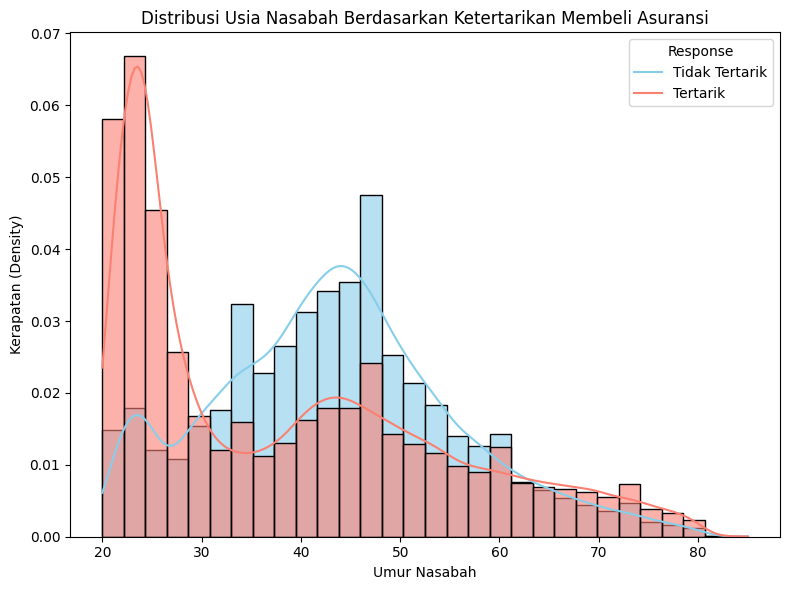

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.histplot(
    data=train,
    x="Age",
    hue="Response",
    kde=True,
    bins=30,
    stat="density",
    common_norm=False,
    palette={0: "salmon", 1: "skyblue"},
    alpha=0.6
)

plt.title("Distribusi Usia Nasabah Berdasarkan Ketertarikan Membeli Asuransi")
plt.xlabel("Umur Nasabah")
plt.ylabel("Kerapatan (Density)")
plt.legend(title="Response", labels=["Tidak Tertarik", "Tertarik"])
plt.tight_layout()
plt.show()


**Interpretasi :** 

Visualisasi tersebut menunjukkan distribusi usia nasabah berdasarkan ketertarikan mereka terhadap pembelian asuransi kendaraan. Dari grafik, terlihat bahwa mayoritas nasabah yang tertarik membeli asuransi (warna merah) cenderung berada pada rentang usia 21 hingga 30 tahun, dengan puncak kepadatan (density) pada usia sekitar 24 tahun. Sementara itu, nasabah yang tidak tertarik (warna biru) memiliki sebaran usia yang lebih luas dan merata, terutama banyak ditemukan pada usia 35 hingga 55 tahun, dengan dua puncak distribusi yang tampak sekitar usia 40 dan 47 tahun.

Hal ini menunjukkan bahwa usia muda lebih berpotensi tertarik membeli asuransi kendaraan, kemungkinan karena mereka baru mulai memiliki kendaraan dan menyadari risiko, atau karena adanya promosi yang menarik untuk usia muda. Sebaliknya, kelompok usia lebih tua tampaknya kurang tertarik, mungkin karena sudah memiliki asuransi sebelumnya, kurang merasa perlu, atau karena faktor pengalaman dan preferensi pribadi.

Insight ini penting bagi perusahaan asuransi untuk menyesuaikan strategi pemasaran berdasarkan segmen usia, seperti fokus kampanye digital pada usia 21–30 tahun dan edukasi risiko untuk usia di atas 40 tahun.


#### 2. Rata-rata Premi Tahunan berdasarkan Usia 

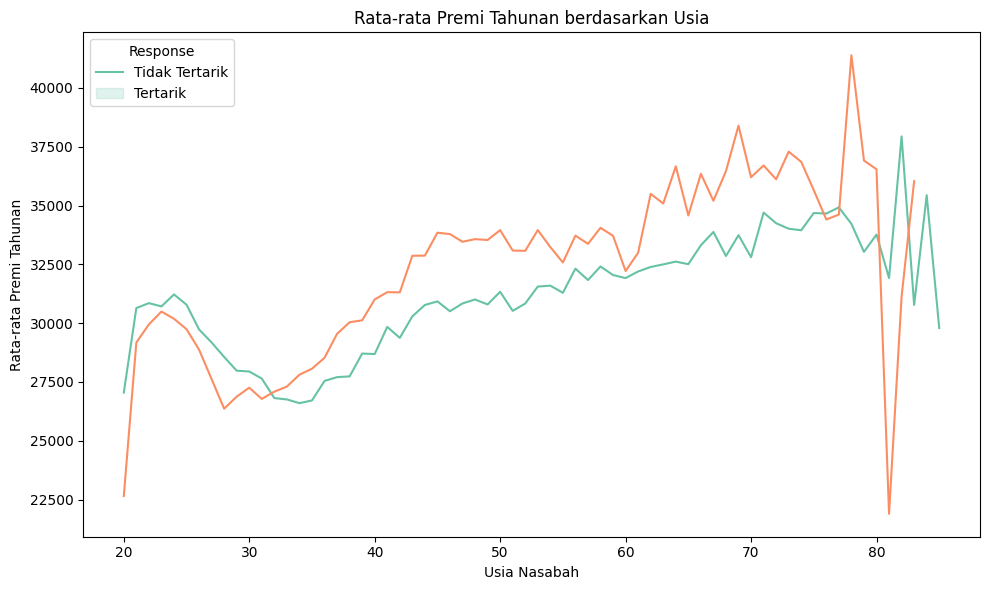

In [12]:
plt.figure(figsize=(10, 6))
mean_premium = train.groupby(['Age', 'Response'])['Annual_Premium'].mean().reset_index()
sns.lineplot(data=mean_premium, x='Age', y='Annual_Premium', hue='Response', palette='Set2')
plt.title('Rata-rata Premi Tahunan berdasarkan Usia')
plt.xlabel('Usia Nasabah')
plt.ylabel('Rata-rata Premi Tahunan')
plt.legend(title='Response', labels=['Tidak Tertarik', 'Tertarik'])
plt.tight_layout()
plt.show()


**Interpretasi :**

Visualisasi tersebut menampilkan proporsi kondisi kendaraan (rusak atau tidak) berdasarkan ketertarikan nasabah terhadap pembelian asuransi kendaraan.

Pada grafik sebelah kiri, yang mewakili nasabah yang tertarik membeli asuransi, terlihat bahwa sebagian besar (97,9%) kendaraan mereka pernah mengalami kerusakan. Hanya sekitar 2,1% dari nasabah tertarik yang kendaraannya tidak pernah rusak. Hal ini mengindikasikan bahwa pengalaman terhadap kerusakan kendaraan sangat memengaruhi keputusan nasabah untuk membeli asuransi.

Sebaliknya, pada grafik sebelah kanan yang mewakili nasabah yang tidak tertarik membeli asuransi, proporsinya lebih seimbang. Sekitar 56,1% belum pernah mengalami kerusakan kendaraan, sedangkan 43,9% pernah mengalami kerusakan. Ini menunjukkan bahwa ketidaktertarikan terhadap asuransi lebih banyak berasal dari mereka yang belum merasakan risiko langsung akibat kerusakan kendaraan.

Dengan demikian, kerusakan kendaraan menjadi faktor pendorong utama dalam ketertarikan membeli asuransi. Perusahaan asuransi dapat memanfaatkan informasi ini untuk menargetkan edukasi dan promosi lebih intensif pada pengguna yang belum mengalami kerusakan, agar mereka memahami potensi risiko sebelum terlambat.

## Modelling 

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay,
    roc_auc_score, log_loss, precision_recall_curve
)
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree, export_text
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [115]:
#GRID SEARCH
# =======================

param_grid = {
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]
}

grid = GridSearchCV(
    estimator=DTC(criterion='entropy', class_weight='balanced', random_state=0),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train_enc, y_train)
print("\nBest Parameters from GridSearchCV:")
print(grid.best_params_)





Best Parameters from GridSearchCV:
{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [116]:
# TRAINING FINAL MODEL

clf = DTC(
    criterion='entropy',
    class_weight='balanced',
    random_state=0,
    max_depth=12,
    min_samples_leaf=1,
    min_samples_split=2
)

clf.fit(X_train_enc, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, random_state=0)

In [117]:
# FEATURE IMPORTANCE
# =======================

feature_names = list(X_train_enc.columns)
importances = pd.Series(clf.feature_importances_, index=feature_names)
print("\nTop Feature Importances:")
print(importances.sort_values(ascending=False).head(10))


Top Feature Importances:
Previously_Insured      0.752539
Vehicle_Damage          0.076671
Age                     0.072394
Policy_Sales_Channel    0.034751
Annual_Premium          0.020266
Vintage                 0.018748
Region_Code             0.016967
Vehicle_Age             0.004437
Gender_Male             0.002749
Driving_License         0.000477
dtype: float64


In [118]:
# STRUKTUR POHON
# =======================

print("\nTree Structure:")
print(export_text(clf, feature_names=feature_names, show_weights=True))


Tree Structure:
|--- Previously_Insured <= 0.50
|   |--- Vehicle_Damage <= 0.50
|   |   |--- Policy_Sales_Channel <= 152.50
|   |   |   |--- Age <= 60.50
|   |   |   |   |--- Region_Code <= 42.50
|   |   |   |   |   |--- Region_Code <= 9.50
|   |   |   |   |   |   |--- Vintage <= 87.50
|   |   |   |   |   |   |   |--- Policy_Sales_Channel <= 25.50
|   |   |   |   |   |   |   |   |--- weights: [28.49, 0.00] class: 0
|   |   |   |   |   |   |   |--- Policy_Sales_Channel >  25.50
|   |   |   |   |   |   |   |   |--- Region_Code <= 8.50
|   |   |   |   |   |   |   |   |   |--- Region_Code <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- Annual_Premium <= 30506.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [43.31, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Annual_Premium >  30506.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Region_Code >  2.50
|   |   |   |   |   |   |   |   |   

## Evaluasi Model


Accuracy: 0.7081
F1 Score: 0.4314
Residual Deviance: 110318.39

Confusion Matrix:
 [[56917 26683]
 [ 1129 10549]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9805    0.6808    0.8037     83600
           1     0.2833    0.9033    0.4314     11678

    accuracy                         0.7081     95278
   macro avg     0.6319    0.7921    0.6175     95278
weighted avg     0.8951    0.7081    0.7580     95278



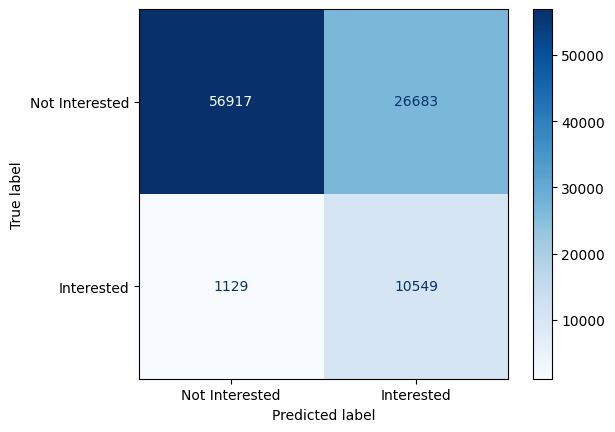

ROC AUC Score: 0.8431


In [119]:
# EVALUASI STANDAR
# =======================

y_pred = clf.predict(X_val_enc)
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
resid_dev = 2 * log_loss(y_val, clf.predict_proba(X_val_enc)) * len(y_val)

print(f"\nAccuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Residual Deviance: {resid_dev:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=4))

# Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Interested", "Interested"])
disp.plot(cmap="Blues")
plt.show()

# ROC AUC Score
if len(clf.classes_) == 2:
    y_proba = clf.predict_proba(X_val_enc)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"ROC AUC Score: {auc:.4f}")

# Prediksi Best Model 

In [120]:
# Prediksi dengan model terbaik
predictions = best_model.predict(X_test_final)

# Buat DataFrame submission
submission = pd.DataFrame({
    'id': test_id,            # gunakan test_id yang disimpan sebelum drop
    'Response': predictions   # sudah dalam bentuk 0/1
})
submission

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0
